<a href="https://colab.research.google.com/github/jjklle/capstone/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **make speech sample with snr value -10, 0, 10**

In [ ]:
import argparse
import array
import math
import numpy as np
import random
import wave  

# get the amplitude of the sound and calculate RMS value(Root Mean Sqaure)

In [ ]:
def cal_amp(wf):
    buffer = wf.readframes(wf.getnframes())
    amptitude = (np.frombuffer(buffer, dtype="int16")).astype(np.float64)
    return amptitude

In [ ]:
def cal_rms(amp):
    return np.sqrt(np.mean(np.square(amp), axis=-1))

# **# Signal-to-Noise Ratio , SRN rate:**
# SNR = 20*log(signal/noise)

In [ ]:
snr_list = [-10,0,10]
snr=0 

In [ ]:
def cal_adjusted_rms(clean_rms, snr):
    a = float(snr) / 20
    noise_rms = clean_rms / (10**a)
    return noise_rms

# **Combine voice and noise**
# Normalize the sound if the amplitude of combined sound goes over 16 bit(32767)

In [ ]:
for i in range(1,6):
  clean_wav = wave.open(f'/content/drive/MyDrive/이지형/공장/data/newclean{2*i}.wav', "r")
  clean_amp = cal_amp(clean_wav)

  for j in range(1,4):
    noise_wav = wave.open(f'/content/drive/MyDrive/이지형/공장/data/output{j}.wav', "r")
    noise_amp = cal_amp(noise_wav)

    start = random.randint(0, len(noise_amp)-len(clean_amp))
    clean_rms = cal_rms(clean_amp)
    split_noise_amp = noise_amp[start: start + len(clean_amp)]
    noise_rms = cal_rms(split_noise_amp)

    for k in snr_list:
      snr=k
      adjusted_noise_rms = cal_adjusted_rms(clean_rms, snr)

      adjusted_noise_amp = split_noise_amp * (adjusted_noise_rms / noise_rms)
      mixed_amp = (clean_amp + adjusted_noise_amp)

      if (mixed_amp.max(axis=0) > 32767): #amplitude represented in 16 bit
              mixed_amp = mixed_amp * (32767/mixed_amp.max(axis=0))
              clean_amp = clean_amp * (32767/mixed_amp.max(axis=0))
              adjusted_noise_amp = adjusted_noise_amp * (32767/mixed_amp.max(axis=0))



      noisy_wave = wave.Wave_write(f'/content/drive/MyDrive/이지형/공장/data/noisy/noisy-voice{i},noise{j},snr{k}.wav')
      noisy_wave.setparams(clean_wav.getparams())
      noisy_wave.writeframes(array.array('h', mixed_amp.astype(np.int16)).tostring() )
      noisy_wave.close()

      clean_wave = wave.Wave_write(f'/content/drive/MyDrive/이지형/공장/data/voice/voice-voice{i},noise{j},snr{k}.wav')
      clean_wave.setparams(clean_wav.getparams())
      clean_wave.writeframes(array.array('h', clean_amp.astype(np.int16)).tostring() )
      clean_wave.close()

      noise_wave = wave.Wave_write(f'/content/drive/MyDrive/이지형/공장/data/noise/noise-voice{i},noise{j},snr{k}.wav')
      noise_wave.setparams(clean_wav.getparams())
      noise_wave.writeframes(array.array('h', adjusted_noise_amp.astype(np.int16)).tostring() )
      noise_wave.close()

In [1]:
import matplotlib.pyplot as plot

from scipy.io import wavfile

In [14]:
# Read the wav file (mono)

clean_frequency, clean_signal = wavfile.read('/content/newclean2.wav')
noisy_frequency, noisy_signal = wavfile.read('/content/noisy-voice1,noise2,snr0.wav')
denoised_frequency, denoised_signal = wavfile.read('/content/denoised.wav')



In [29]:
def spectrogram(name, frequency, signal):
  plot.subplot(211)
  plot.title(f'Spectrogram of a wav file of {name}',)
  plot.plot(signal)
  plot.xlabel('Sample')
  plot.ylabel('Amplitude')
  plot.subplot(212)
  plot.specgram(signal,Fs=frequency)
  plot.xlabel('Time')
  plot.ylabel('Frequency')
  plot.show()
  #plot.savefig(f'/content/{name}.png')

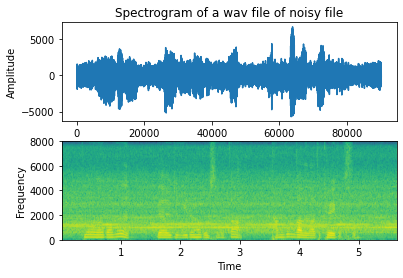

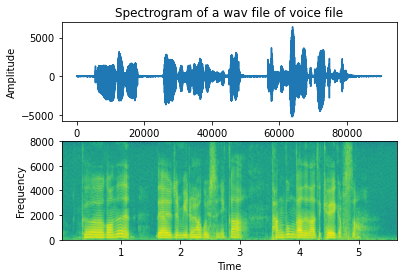

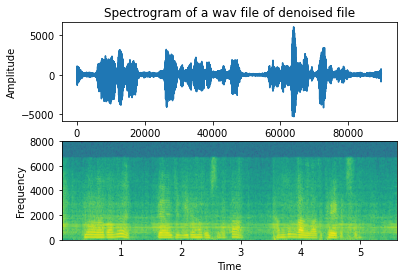

In [30]:
spectrogram("noisy file",noisy_frequency, noisy_signal)
spectrogram("voice file",clean_frequency, clean_signal)
spectrogram("denoised file", denoised_frequency, denoised_signal)